# Cambio a CSV con separador ; y en cadenas todos

In [21]:
import pandas as pd
import csv

# Lee los archivos CSV originales
df1 = pd.read_csv('rooms.csv', sep=',',  dtype=str, quoting=csv.QUOTE_MINIMAL)
df2 = pd.read_csv('hosts.csv', sep=',',  dtype=str, quoting=csv.QUOTE_MINIMAL)
df3 = pd.read_csv('reviews.csv', sep=',',  dtype=str, quoting=csv.QUOTE_MINIMAL)

# Función para asegurarse de que los valores estén entre comillas dobles solo si no las tienen
def ensure_quotes(value):
    if pd.isna(value):
        return '""'  # Tratamiento para valores nulos
    value = str(value)  # Asegurarse de que el valor sea una cadena
    if not (value.startswith('"') and value.endswith('"')):
        return f'"{value}"'
    return value

# Aplicar la función a cada columna usando `apply` con `map` en lugar de `applymap`
df1 = df1.apply(lambda col: col.map(ensure_quotes))
df2 = df2.apply(lambda col: col.map(ensure_quotes))
df3 = df3.apply(lambda col: col.map(ensure_quotes))

# Guardar los nuevos CSV con separación por punto y coma, sin agregar comillas adicionales
df1.to_csv('rooms_clean.csv', sep=';', index=False, quoting=csv.QUOTE_NONE, escapechar='\\')
df2.to_csv('hosts_clean.csv', sep=';', index=False, quoting=csv.QUOTE_NONE, escapechar='\\')
df3.to_csv('reviews_clean.csv', sep=';', index=False, quoting=csv.QUOTE_NONE, escapechar='\\')


# Cambio a Excel

In [22]:
import pandas as pd

# Lee los archivos CSV limpios
df1 = pd.read_csv('rooms_clean.csv', sep=';',  dtype=str)
df2 = pd.read_csv('hosts_clean.csv', sep=';',  dtype=str)
df3 = pd.read_csv('reviews_clean.csv', sep=';',  dtype=str)

# Guardar cada DataFrame en un archivo Excel separado usando openpyxl
df1.to_excel('rooms_clean.xlsx', index=False, engine='openpyxl')
df2.to_excel('hosts_clean.xlsx', index=False,engine='openpyxl')
df3.to_excel('reviews_clean.xlsx', index=False, engine='openpyxl')


In [29]:
import pandas as pd

# Lee los archivos CSV limpios
df = pd.read_csv('reviews_transformados.csv', sep=',',  dtype=str)


# Guardar cada DataFrame en un archivo Excel separado usando openpyxl
df.to_excel('reviews_transformados.xlsx', index=False, engine='openpyxl')


# cambio a JSON


In [25]:
import pandas as pd
import csv

# Lee los archivos CSV originales
df1 = pd.read_csv('rooms.csv', sep=',', dtype=str, quoting=csv.QUOTE_MINIMAL)
df2 = pd.read_csv('hosts.csv', sep=',', dtype=str, quoting=csv.QUOTE_MINIMAL)
df3 = pd.read_csv('reviews.csv', sep=',', dtype=str, quoting=csv.QUOTE_MINIMAL)

# Función para asegurarse de que los valores estén entre comillas dobles solo si no las tienen
def ensure_quotes(value):
    if pd.isna(value):
        return ''  # Tratamiento para valores nulos
    value = str(value)  # Asegurarse de que el valor sea una cadena
    if not (value.startswith('"') and value.endswith('"')):
        return value
    return value.strip('"')

# Aplicar la función a cada columna usando `apply` con `map` en lugar de `applymap`
df1 = df1.apply(lambda col: col.map(ensure_quotes))
df2 = df2.apply(lambda col: col.map(ensure_quotes))
df3 = df3.apply(lambda col: col.map(ensure_quotes))

# Guardar los nuevos CSV con separación por punto y coma, sin agregar comillas adicionales
df1.to_csv('rooms_clean.csv', sep=';', index=False, quoting=csv.QUOTE_NONE, escapechar='\\')
df2.to_csv('hosts_clean.csv', sep=';', index=False, quoting=csv.QUOTE_NONE, escapechar='\\')
df3.to_csv('reviews_clean.csv', sep=';', index=False, quoting=csv.QUOTE_NONE, escapechar='\\')

# Convertir los CSV limpios a JSON
def csv_to_json(csv_file, json_file):
    df = pd.read_csv(csv_file, sep=';', dtype=str, quoting=csv.QUOTE_NONE, escapechar='\\')
    df.to_json(json_file, orient='records', lines=True, force_ascii=False)

# Convertir archivos CSV limpios a JSON
csv_to_json('rooms_clean.csv', 'rooms_clean.json')
csv_to_json('hosts_clean.csv', 'hosts_clean.json')
csv_to_json('reviews_clean.csv', 'reviews_clean.json')


In [46]:
import os
from google.cloud import bigquery
import pandas as pd
from IPython.display import display

# Verificar la existencia del archivo JSON
if os.path.exists("C:/Users/Oberb/OneDrive/Documentos/Laboratoria/airbnb-pj6-74ca3bc4eb67.json"):
    print("El archivo json existe.")
else:
    print("El archivo .json no se encuentra.")

# Establecer la ruta al archivo JSON de la clave de la cuenta de servicio
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/Oberb/OneDrive/Documentos/Laboratoria/airbnb-pj6-74ca3bc4eb67.json"

# Crear un cliente de BigQuery
client = bigquery.Client()

queries = {
    "rooms": """
    SELECT
      *
    FROM
      `airbnb-pj6.datasets_pj6.rooms-pre-charge`
    """,
    "hosts": """
    SELECT
      *
    FROM
      `airbnb-pj6.datasets_pj6.hosts-pre-charge`
    """,
    "reviews": """
    SELECT
      *
    FROM
      `airbnb-pj6.datasets_pj6.reviews-pre-charge`
    """
}

# Función para ejecutar una consulta y devolver el DataFrame
def execute_query(query):
    try:
        # Ejecuta la consulta y convierte los resultados en un DataFrame
        df = client.query(query).to_dataframe()
        return df
    except Exception as e:
        print(f"Error: {e}")
        return pd.DataFrame()  # Retorna un DataFrame vacío en caso de error

# Ejecuta y almacena los DataFrames para cada consulta
df_rooms = execute_query(queries["rooms"])
df_hosts = execute_query(queries["hosts"])
df_reviews = execute_query(queries["reviews"])

# Configura las opciones de Pandas para mostrar los DataFrames
pd.set_option('display.max_rows', 20)  # Cambia este valor según sea necesario
pd.set_option('display.max_columns', 20)  # Cambia este valor según sea necesario

# Muestra el DataFrame para 'rooms'
print("DataFrame para rooms:")
display(df_rooms)
print("Encabezados del DataFrame rooms:")
print(", ".join(df_rooms.columns))
print("")

# Muestra el DataFrame para 'hosts'
print("DataFrame para hosts:")
display(df_hosts)
print("Encabezados del DataFrame hosts:")
print(", ".join(df_hosts.columns))
print("")

# Muestra el DataFrame para 'reviews'
print("DataFrame para reviews:")
display(df_reviews)
print("Encabezados del DataFrame reviews:")
print(", ".join(df_reviews.columns))
print("")

El archivo json existe.
DataFrame para rooms:


,id,name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,minimum_nights
0,20016493,"ART LOFT/HOME: DINNERS, GATHERINGS, PHOTO",NoHo,Manhattan,40.72560,-73.99487,Entire home/apt,1
1,1354775,Sunlit Noho Loft,NoHo,Manhattan,40.72631,-73.99387,Entire home/apt,1
2,6314148,"Beautiful, SEXY apartment",NoHo,Manhattan,40.72652,-73.99259,Entire home/apt,1
3,23417781,Upscale living on Lafayette St. NoHO,NoHo,Manhattan,40.72764,-73.993,Entire home/apt,1
4,29230390,Your New York Penthouse,NoHo,Manhattan,40.72870,-73.99184,Entire home/apt,1
...,...,...,...,...,...,...,...,...
48705,24883987,Musician's Apartment Near the Park,Prospect-Lefferts Gardens,Brooklyn,40.66364,-73.94978,Entire home/apt,60
48706,29710463,"2 bedroom, one bath in Crown Heights",Prospect-Lefferts Gardens,Brooklyn,40.66249,-73.95075,Entire home/apt,90
48707,34123769,private room in new luxury building,Prospect-Lefferts Gardens,Brooklyn,40.65629,-73.95177,Private room,120
48708,20148331,"BIG-3 BDRM house, 1hr to Manhattan, near beach","Bay Terrace, Staten Island",Staten Island,40.55182,-74.14439,Entire home/apt,3


Encabezados del DataFrame rooms:
id, name, neighbourhood, neighbourhood_group, latitude, longitude, room_type, minimum_nights

DataFrame para hosts:


,host_id,host_name
0,919218,Sin nombre en base de datos
1,5300585,Sin nombre en base de datos
2,7779204,Sin nombre en base de datos
3,100971588,Sin nombre en base de datos
4,32722063,Sin nombre en base de datos
...,...,...
37357,261007573,Adria Hotel & Conference Center
37358,2992042,"Christopher, Samantha And Mason"
37359,34813079,Jennifer (And My Brother Gordon)
37360,4224309,Rachel...You Can Call Me Kaya :)


Encabezados del DataFrame hosts:
host_id, host_name

DataFrame para reviews:


,id,host_id,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10000070,51372003,55,5,2017-08-13,0.12,2,213
1,100002,523218,67,136,2019-06-17,1.37,1,296
2,10000470,51374331,57,175,2019-06-28,4.08,1,38
3,10000943,6891770,199,10,2017-04-18,0.25,1,0
4,10001022,27078779,105,0,None,NaN,1,0
...,...,...,...,...,...,...,...,...
48705,9999252,2880824,85,1,2016-01-03,0.02,1,0
48706,9999351,51368588,170,35,2019-04-25,0.82,2,0
48707,999977,5497326,295,2,2017-08-19,0.03,2,0
48708,999984,5468033,300,108,2019-07-01,1.44,1,318


Encabezados del DataFrame reviews:
id, host_id, price, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365



# Verificacion duplicados

In [47]:
import os
import pandas as pd
from IPython.display import display

def count_duplicates(df):
    duplicates_count = {}
    for column in df.columns:
        # Contar los valores duplicados en cada columna
        duplicate_count = df[column].duplicated().sum()
        duplicates_count[column] = duplicate_count
    return duplicates_count

# Contar duplicados en cada DataFrame
duplicates_rooms = count_duplicates(df_rooms)
duplicates_hosts = count_duplicates(df_hosts)
duplicates_reviews = count_duplicates(df_reviews)

# Mostrar los resultados
print("Duplicados en DataFrame 'rooms':")
for col, count in duplicates_rooms.items():
    print(f"{col}: {count} duplicados")

print("\nDuplicados en DataFrame 'hosts':")
for col, count in duplicates_hosts.items():
    print(f"{col}: {count} duplicados")

print("\nDuplicados en DataFrame 'reviews':")
for col, count in duplicates_reviews.items():
    print(f"{col}: {count} duplicados")


Duplicados en DataFrame 'rooms':
id: 0 duplicados
name: 974 duplicados
neighbourhood: 48489 duplicados
neighbourhood_group: 48705 duplicados
latitude: 29702 duplicados
longitude: 34029 duplicados
room_type: 48707 duplicados
minimum_nights: 48602 duplicados

Duplicados en DataFrame 'hosts':
host_id: 0 duplicados
host_name: 25940 duplicados

Duplicados en DataFrame 'reviews':
id: 0 duplicados
host_id: 11370 duplicados
price: 48036 duplicados
number_of_reviews: 48316 duplicados
last_review: 46945 duplicados
reviews_per_month: 47776 duplicados
calculated_host_listings_count: 48663 duplicados
availability_365: 48344 duplicados


# Discrepancias

In [49]:
import pandas as pd
import numpy as np

# Función para listar discrepancias en cada columna de un DataFrame
def list_discrepancies(df):
    discrepancies = {}
    for column in df.columns:
        column_data = df[column]
        
        # Inicializar el diccionario para almacenar discrepancias
        column_discrepancies = []
        
        # Verificar valores nulos y vacíos
        null_values = column_data.isnull().sum()
        if null_values > 0:
            column_discrepancies.append(f"Valores nulos: {null_values}")

        # Verificar valores vacíos
        empty_values = (column_data == '').sum()
        if empty_values > 0:
            column_discrepancies.append(f"Valores vacíos: {empty_values}")

        # Verificar valores fuera de rango
        if pd.api.types.is_numeric_dtype(column_data):
            min_value, max_value = column_data.min(), column_data.max()
            # Ajusta estos rangos según el contexto esperado
            if min_value < 0:
                column_discrepancies.append(f"Valores negativos: {column_data[column_data < 0].count()}")
            if max_value > 1000000:  # Ejemplo: ajustar según el rango esperado
                column_discrepancies.append(f"Valores excesivamente grandes: {column_data[column_data > 1000000].count()}")

        # Verificar formato incorrecto (ejemplo para fechas y correos electrónicos)
        if pd.api.types.is_datetime64_any_dtype(column_data):
            invalid_dates = column_data[column_data.isna()]
            if not invalid_dates.empty:
                column_discrepancies.append(f"Fechas inválidas: {len(invalid_dates)}")

        # Verificar valores inesperados (ejemplo para categorías esperadas)
        if isinstance(column_data.dtype, pd.CategoricalDtype):
            unique_values = column_data.unique()
            # Ajusta esta lista según los valores esperados
            expected_values = set(['value1', 'value2', 'value3'])
            unexpected_values = set(unique_values) - expected_values
            if unexpected_values:
                column_discrepancies.append(f"Valores inesperados: {', '.join(map(str, unexpected_values))}")

        if column_discrepancies:
            discrepancies[column] = column_discrepancies

    return discrepancies

# Listar discrepancias para cada DataFrame
discrepancies_rooms = list_discrepancies(df_rooms)
discrepancies_hosts = list_discrepancies(df_hosts)
discrepancies_reviews = list_discrepancies(df_reviews)

# Mostrar discrepancias en cada DataFrame
def print_discrepancies(discrepancies, name):
    print(f"Discrepancias en DataFrame '{name}':")
    for column, issues in discrepancies.items():
        print(f"\nColumna: {column}")
        for issue in issues:
            print(f"  - {issue}")

# Imprimir las discrepancias
print_discrepancies(discrepancies_rooms, 'rooms')
print_discrepancies(discrepancies_hosts, 'hosts')
print_discrepancies(discrepancies_reviews, 'reviews')


Discrepancias en DataFrame 'rooms':
Discrepancias en DataFrame 'hosts':
Discrepancias en DataFrame 'reviews':

Columna: last_review
  - Valores nulos: 10016

Columna: reviews_per_month
  - Valores nulos: 10016


In [51]:
import pandas as pd

# Filtra las filas donde 'last_review' es NaN o null
df_reviews_null_last_review = df_reviews[df_reviews['last_review'].isnull()]

# Configura las opciones de Pandas para mostrar el DataFrame
pd.set_option('display.max_rows', 20)  # Cambia este valor según sea necesario
pd.set_option('display.max_columns', 20)  # Cambia este valor según sea necesario

# Muestra el DataFrame filtrado
display(df_reviews_null_last_review)

# Muestra los encabezados del DataFrame
print("Encabezados del DataFrame:")
print(", ".join(df_reviews_null_last_review.columns))


,id,host_id,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,10001022,27078779,105,0,None,NaN,1,0
8,10008874,4409832,150,0,None,NaN,1,0
12,10011009,8936313,120,0,None,NaN,1,0
18,10012372,51422338,50,0,None,NaN,1,0
27,10015340,51434460,60,0,None,NaN,1,0
...,...,...,...,...,...,...,...,...
48683,9995077,51348096,65,0,None,NaN,1,0
48693,9997006,50695071,70,0,None,NaN,1,0
48694,9997433,51358854,154,0,None,NaN,1,0
48699,9998154,32993860,129,0,None,NaN,1,0


Encabezados del DataFrame:
id, host_id, price, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365


# Verificacion de outliers

DataFrame: df_rooms, Columna: latitude
Outliers desde 40.58 hasta 40.87
Total de outliers: 423



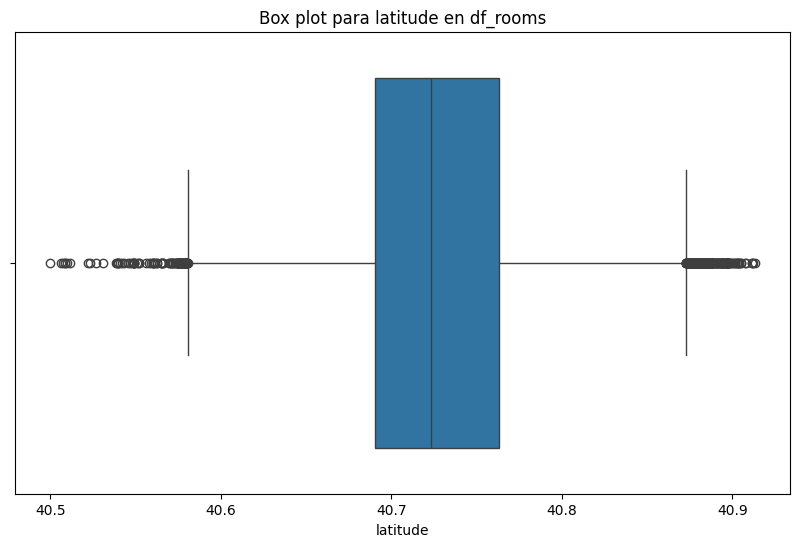

DataFrame: df_rooms, Columna: minimum_nights
Outliers desde -5.00 hasta 11.00
Total de outliers: 6593



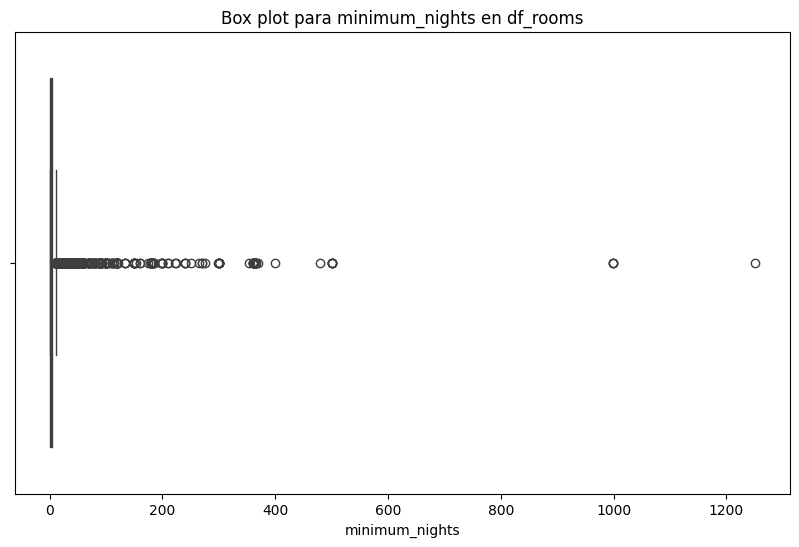

DataFrame: df_reviews, Columna: price
Outliers desde -90.00 hasta 334.00
Total de outliers: 2962



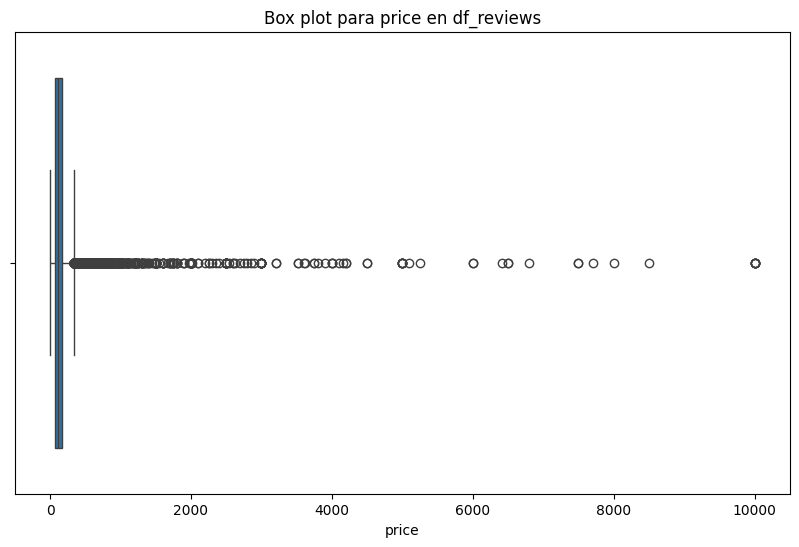

DataFrame: df_reviews, Columna: reviews_per_month
Outliers desde -2.54 hasta 4.74
Total de outliers: 1807



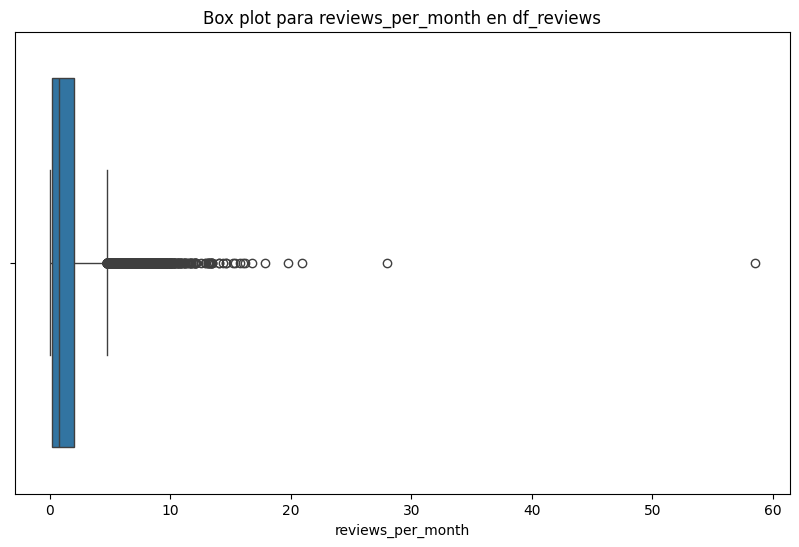

DataFrame: df_reviews, Columna: calculated_host_listings_count
Outliers desde -0.50 hasta 3.50
Total de outliers: 7055



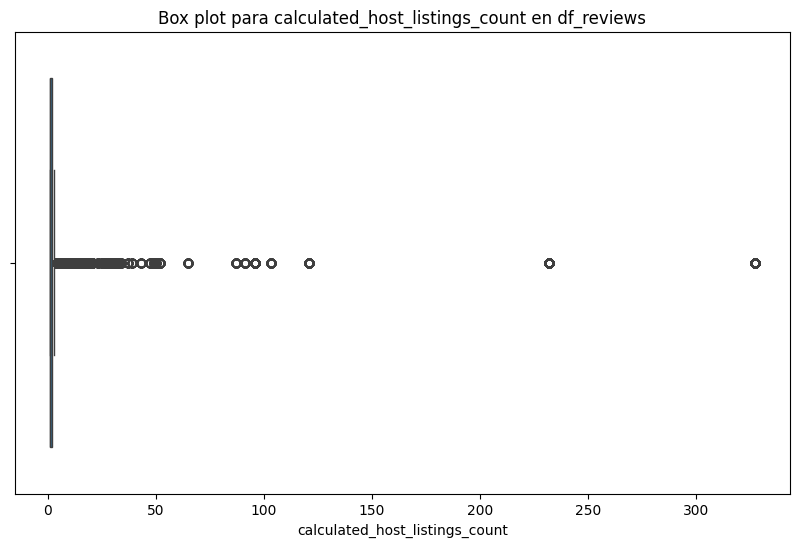

DataFrame: df_reviews, Columna: availability_365
Outliers desde -339.00 hasta 565.00
Total de outliers: 0



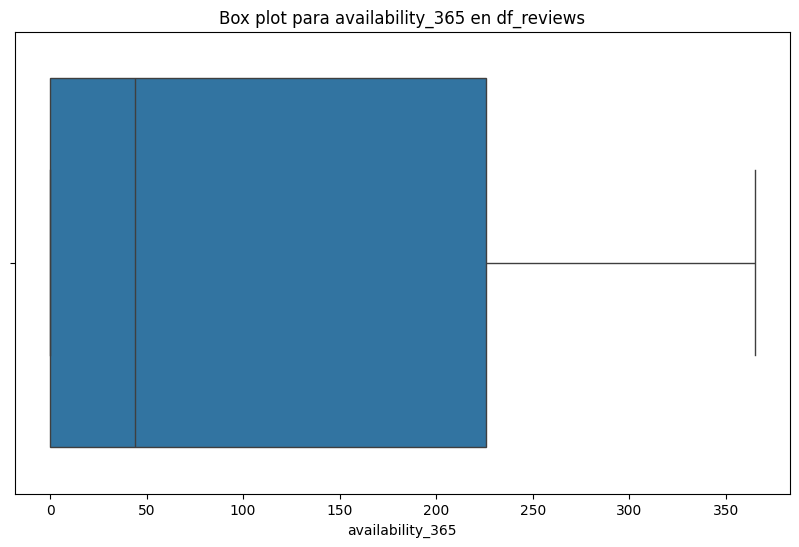

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_boxplots_with_outliers(df, df_name):
    # Itera sobre cada columna en el DataFrame
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Crear un box plot
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[column])
            
            # Obtener los valores de outliers
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtrar los outliers
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            
            # Mostrar los outliers
            print(f"DataFrame: {df_name}, Columna: {column}")
            print(f"Outliers desde {lower_bound:.2f} hasta {upper_bound:.2f}")
            print(f"Total de outliers: {outliers.shape[0]}")
            print()
            
            plt.title(f"Box plot para {column} en {df_name}")
            plt.show()

# Generar los box plots para cada DataFrame
plot_boxplots_with_outliers(df_rooms, "df_rooms")
plot_boxplots_with_outliers(df_reviews, "df_reviews")
plot_boxplots_with_outliers(df_hosts, "df_hosts")
